In [180]:
ds = clean_xlsx_dataset(os.path.join(SOURCE_PATH, 'datasets/MoWTe2/20170725_MoWTe2.xlsx'))
ds

time                                        path  \
file                                                                 
f57748           10% W  20170724_MoW_10Te/fits/20170725_57748.fits   
f57749           10% W  20170724_MoW_10Te/fits/20170725_57749.fits   
f00001           19% W  20170724_MoW_10Te/fits/20170725_00001.fits   
f00002           19% W  20170724_MoW_10Te/fits/20170725_00002.fits   
f00004           19% W  20170724_MoW_10Te/fits/20170725_00004.fits   
f00005           19% W  20170724_MoW_10Te/fits/20170725_00005.fits   
f00006           19% W  20170724_MoW_10Te/fits/20170725_00006.fits   
f00007           19% W  20170724_MoW_10Te/fits/20170725_00007.fits   
f00008           19% W  20170724_MoW_10Te/fits/20170725_00008.fits   
f00009           19% W  20170724_MoW_10Te/fits/20170725_00009.fits   
f00011        16:00:00  20170724_MoW_10Te/fits/20170727_00011.fits   
f00012        16:50:00  20170724_MoW_10Te/fits/20170727_00012.fits   
f00013        17:38:00  20170724_MoW_10Te/fits/20170727_00013.fits   
f00014        18:15:00  20170724_MoW_10Te/fits/20170727_00014.fits   
f00015        18:15:00  20170724_MoW_10Te/fits/20170727_00015.fits   
f00016        19:33:00  20170724_MoW_10Te/fits/20170727_00016.fits   
f00017        19:44:00  20170724_MoW_10Te/fits/20170727_00017.fits   
f00018        20:14:00  20170724_MoW_10Te/fits/20170727_00018.fits   
f00019        20:14:00  20170724_MoW_10Te/fits/20170727_00019.fits   
f00020        22:46:00  20170724_MoW_10Te/fits/20170727_00020.fits   
f00021        23:42:00  20170724_MoW_10Te/fits/20170728_00021.fits   
f00022        00:15:00  20170724_MoW_10Te/fits/20170728_00022.fits   
f00023        00:45:00  20170724_MoW_10Te/fits/20170728_00023.fits   
f00024        01:07:00  20170724_MoW_10Te/fits/20170728_00024.fits   
f00027        11:31:00  20170724_MoW_10Te/fits/20170728_00027.fits   
f00028        12:16:00  20170724_MoW_10Te/fits/20170728_00028.fits   
f00029        13:45:00  20170724_MoW_10Te/fits/20170728_00029.fits   
f00030        14:30:00  20170724_MoW_10Te/fits/20170728_00030.fits   
f00031        15:00:00  20170724_MoW_10Te/fits/20170728_00031.fits   
f00032        16:00:00  20170724_MoW_10Te/fits/20170728_00032.fits   
...                ...                                         ...   
f00057        06:30:00  20170724_MoW_10Te/fits/20170802_00057.fits   
f00058        08:27:00  20170724_MoW_10Te/fits/20170802_00058.fits   
f00059        10:02:00  20170724_MoW_10Te/fits/20170802_00059.fits   
f00060  ABIGAIL contd.  20170724_MoW_10Te/fits/20170802_00060.fits   
f00061        15:46:00  20170724_MoW_10Te/fits/20170822_00061.fits   
f00062        18:20:00  20170724_MoW_10Te/fits/20170822_00062.fits   
f00063        11:44:00  20170724_MoW_10Te/fits/20170823_00063.fits   
f00064        14:45:00  20170724_MoW_10Te/fits/20170823_00064.fits   
f00065        14:58:00  20170724_MoW_10Te/fits/20170823_00065.fits   
f00066        15:34:00  20170724_MoW_10Te/fits/20170823_00066.fits   
f00067        16:24:00  20170724_MoW_10Te/fits/20170823_00067.fits   
f00068        16:47:00  20170724_MoW_10Te/fits/20170823_00068.fits   
f00069        17:21:00  20170724_MoW_10Te/fits/20170823_00069.fits   
f00070        17:31:00  20170724_MoW_10Te/fits/20170823_00070.fits   
f00071        22:21:00  20170724_MoW_10Te/fits/20170823_00071.fits   
f00072        22:30:00  20170724_MoW_10Te/fits/20170823_00072.fits   
f00073        22:42:00  20170724_MoW_10Te/fits/20170823_00073.fits   
f00074        23:12:00  20170724_MoW_10Te/fits/20170823_00074.fits   
f00075        23:30:00  20170724_MoW_10Te/fits/20170823_00075.fits   
f00076        00:30:00  20170724_MoW_10Te/fits/20170824_00076.fits   
f00077        01:05:00  20170724_MoW_10Te/fits/20170824_00077.fits   
f00078        01:49:00  20170724_MoW_10Te/fits/20170824_00078.fits   
f00079        02:33:00  20170724_MoW_10Te/fits/20170824_00079.fits   
f00080        03:33:00  20170724_MoW_10Te/fits/20170824_00080.fits   
f00081        04:30:00  2017

In [167]:
from arpes.models.spectrum import load_scan
test = dict(ds.loc['f00058'])
test['file'] = test['path']

<IPython.core.display.Javascript object>


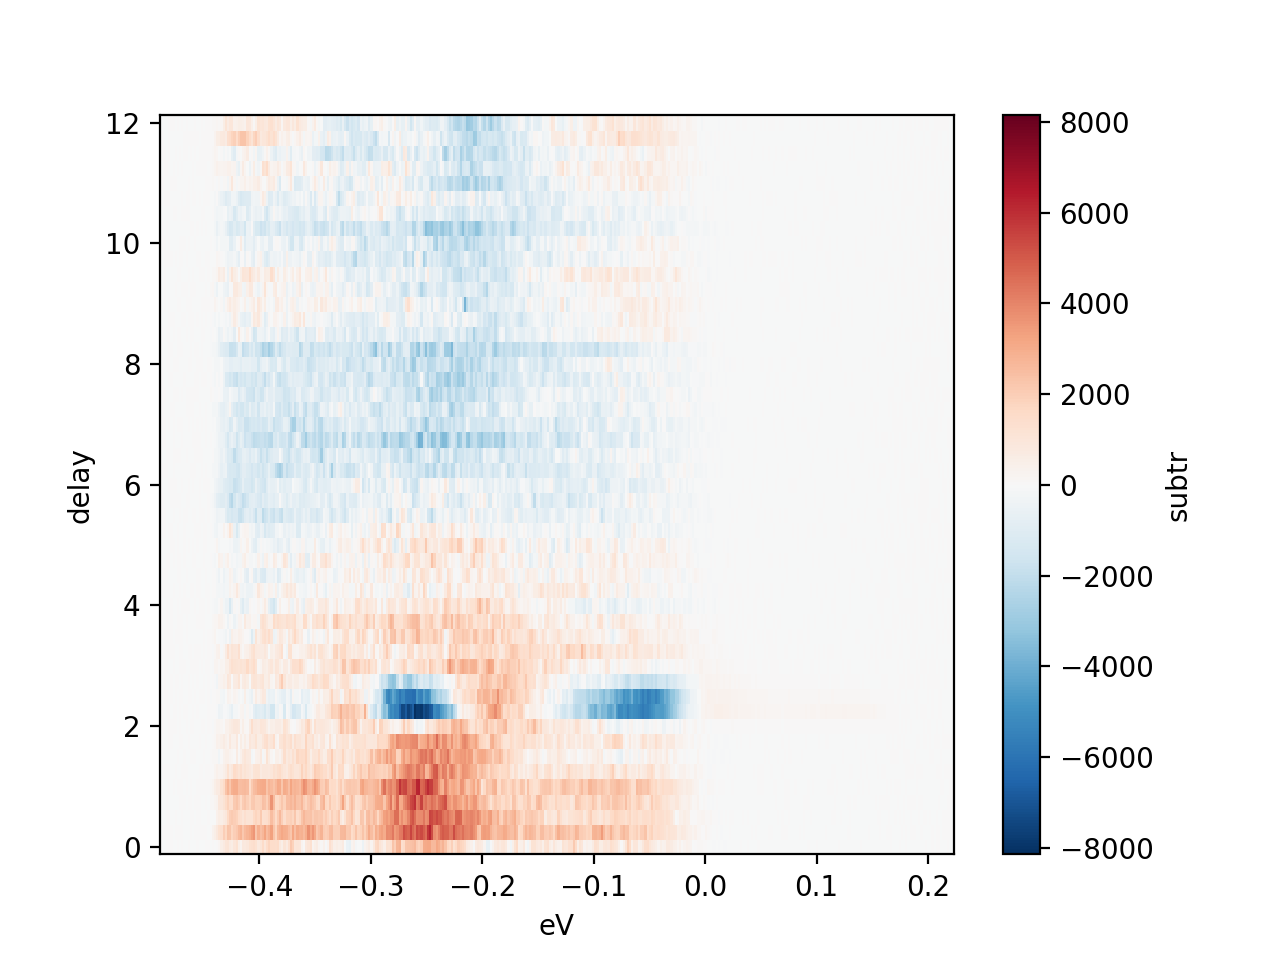

In [163]:
darr = load_scan(test)
darr['summed'] = darr.raw.sum('cycle')
darr['subtr'] = (darr.summed - darr.summed.sum('delay') / len(darr.summed.coords['delay']))
(darr.subtr.sel(phi=slice(-20, -10)).sum('phi')).plot()


In [166]:
%%opts Curve {+framewise}
autoview(darr.summed.sel(delay=2.5, method='nearest').sel(eV=slice(-0.05, 0)))

:AdjointLayout
   :DynamicMap   []
   :DynamicMap   []
   :DynamicMap   []

<IPython.core.display.Javascript object>


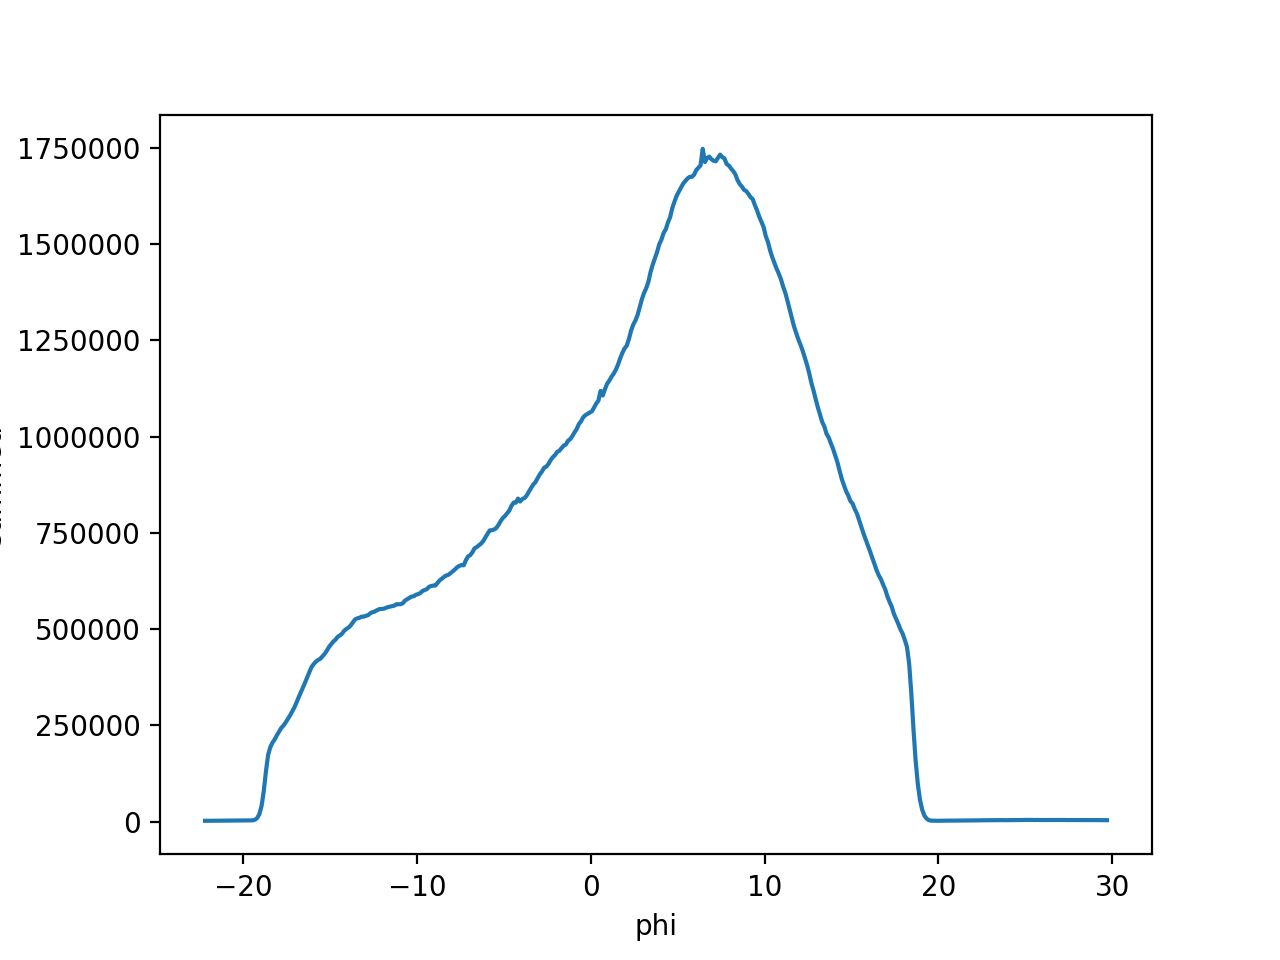

In [133]:
top = darr.summed.sel(eV=slice(-0.1, 0)).sum(['polar', 'eV']).plot()

In [98]:
edges = edges[int(embed_size / 2)]

In [103]:
np.min(np.where(edges == 1))

31

In [105]:
from arpes.preparation import infer_center_pixel

In [112]:
float(infer_center_pixel(darr.raw))

(array([ 31, 204, 275, 324]),)


258.5

# Setting Normal Incidence Pixels

## Map for f00055

In [202]:
from arpes.models.spectrum import load_MC
from arpes.io import load_dataset
test = dict(ds.loc['f00055'])
map_55 = load_dataset(test['id'])

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [203]:
from arpes.plotting import fermi_surface_slices

In [246]:
fermi_surface_slices(map_55, ev_per_slice=0.03)

:Layout
   .Image.Hyphen_minus_0_eV              :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_03_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_06_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_09_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_12_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_15_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_18_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_21_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_24_eV :Image   [phi,polar]   (z)

<IPython.core.display.Javascript object>


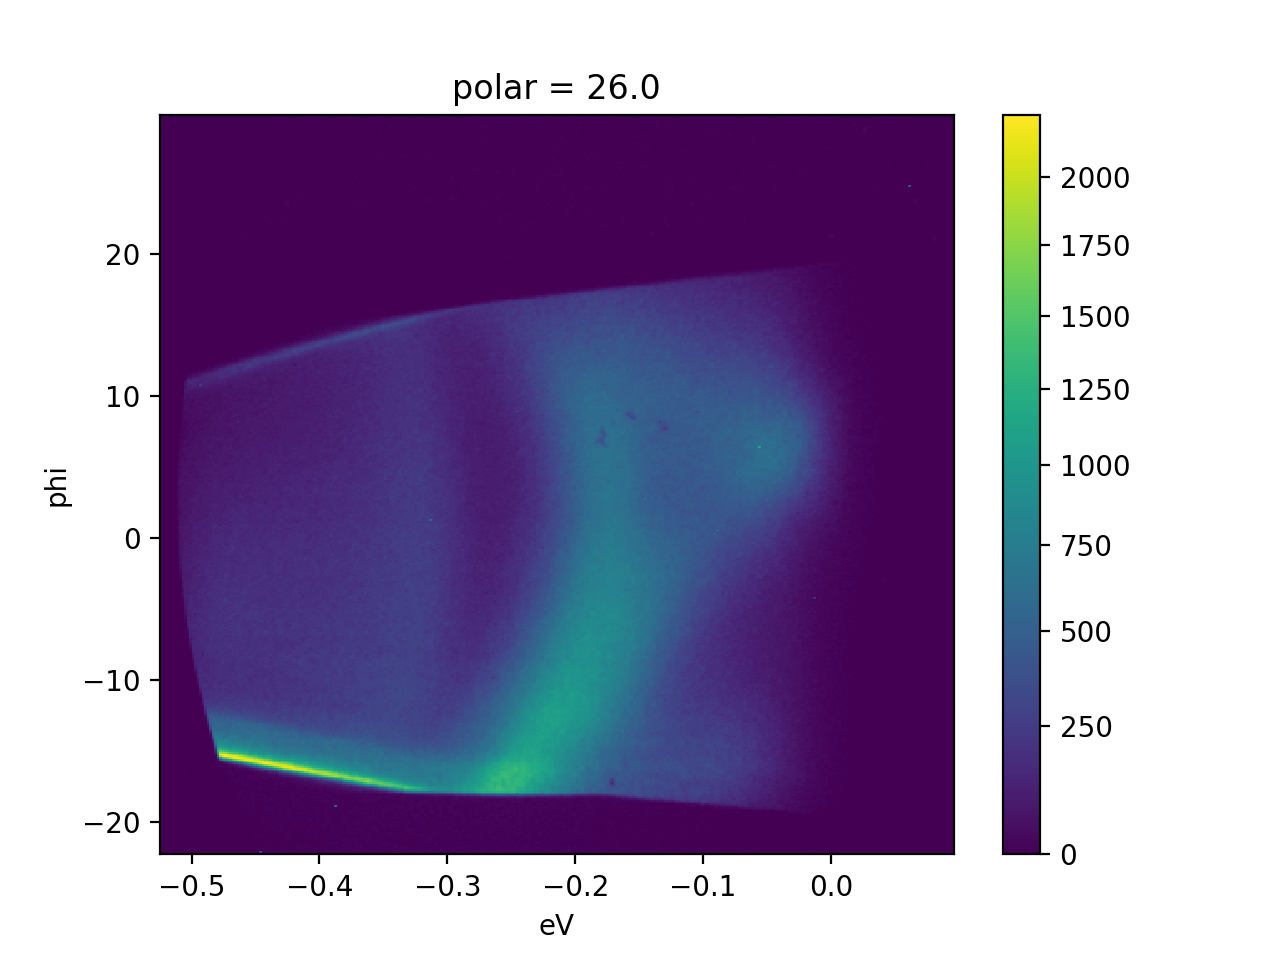

In [221]:
from matplotlib import colors
map_55.sum('cycle').sel(polar=slice(19, 33)).sel(polar=26, method='nearest').plot(norm=colors.PowerNorm(gamma=0.8))

## Map for f00073

In [252]:
map_73 = load_dataset(ds.loc['f00073', ('id',)])
map_73.sel(eV=0, method='nearest').plot()

ValueError: %s is not cached on the FS

In [253]:
fermi_surface_slices(map_73.sel(polar=slice(20, 40)))
map73.sel(eV=0, method='nearest').plot()

NameError: name 'map73' is not defined

<IPython.core.display.Javascript object>


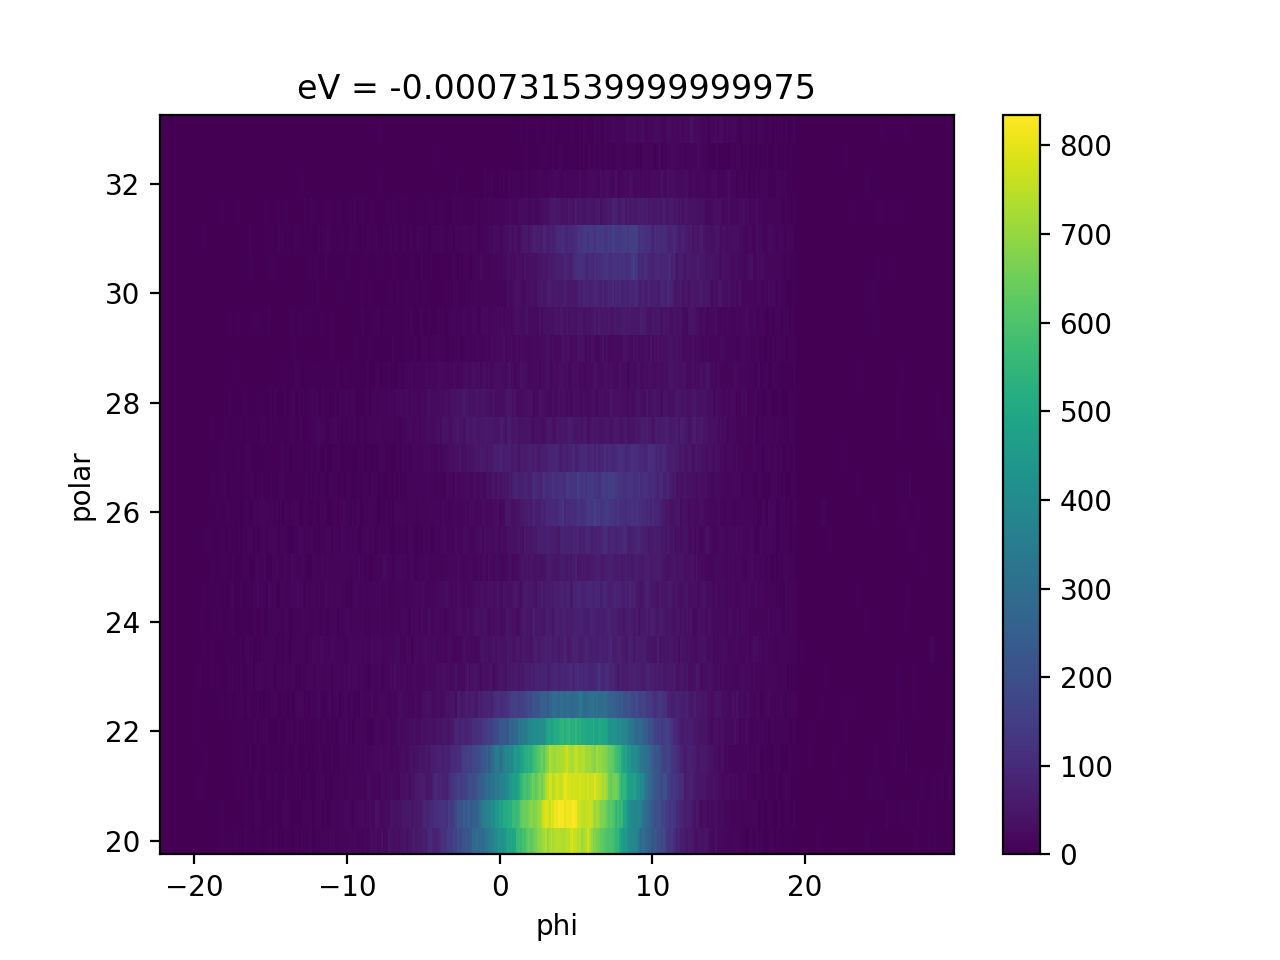

In [220]:
map_55.sum('cycle').sel(eV=0, method='nearest').sel(polar=slice(20, 35)).plot()

From the above, it appears that the polar offset is 27 degrees. By comparing the Fermi surface here to the one in f00055 above, the phi offset is -22 degrees. This was determined by noting that on the basis of the symmetry we nominally assigned the true polar coordinate at the edge of the arc  a polar angle of 24 degrees

## Map for f00041

In [227]:
map_41 = load_dataset(ds.loc['f00041', ('id',)])

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


<IPython.core.display.Javascript object>


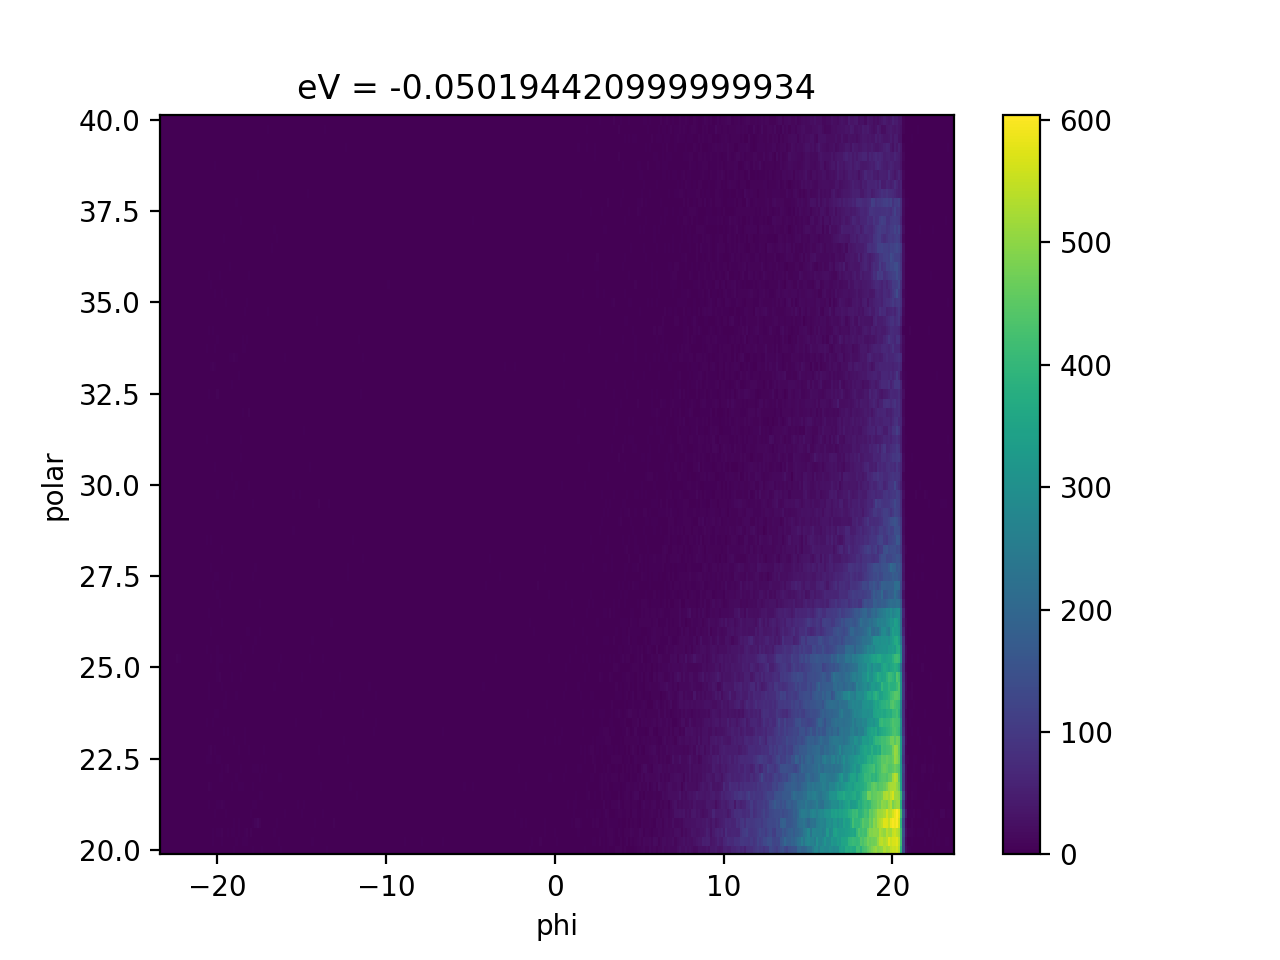

In [240]:
map_41.sel(eV=-0.05, method='nearest').plot()

This map is in the wrong orientation, you can just see along the Gamma to electron pocket at around phi=25 just off the edge of the map. Subsequent scans were rotated by 90 degrees so it is hard to orient them.

## Map for f00032

In [241]:
map_41 = load_dataset(ds.loc['f00032', ('id',)])

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


<IPython.core.display.Javascript object>


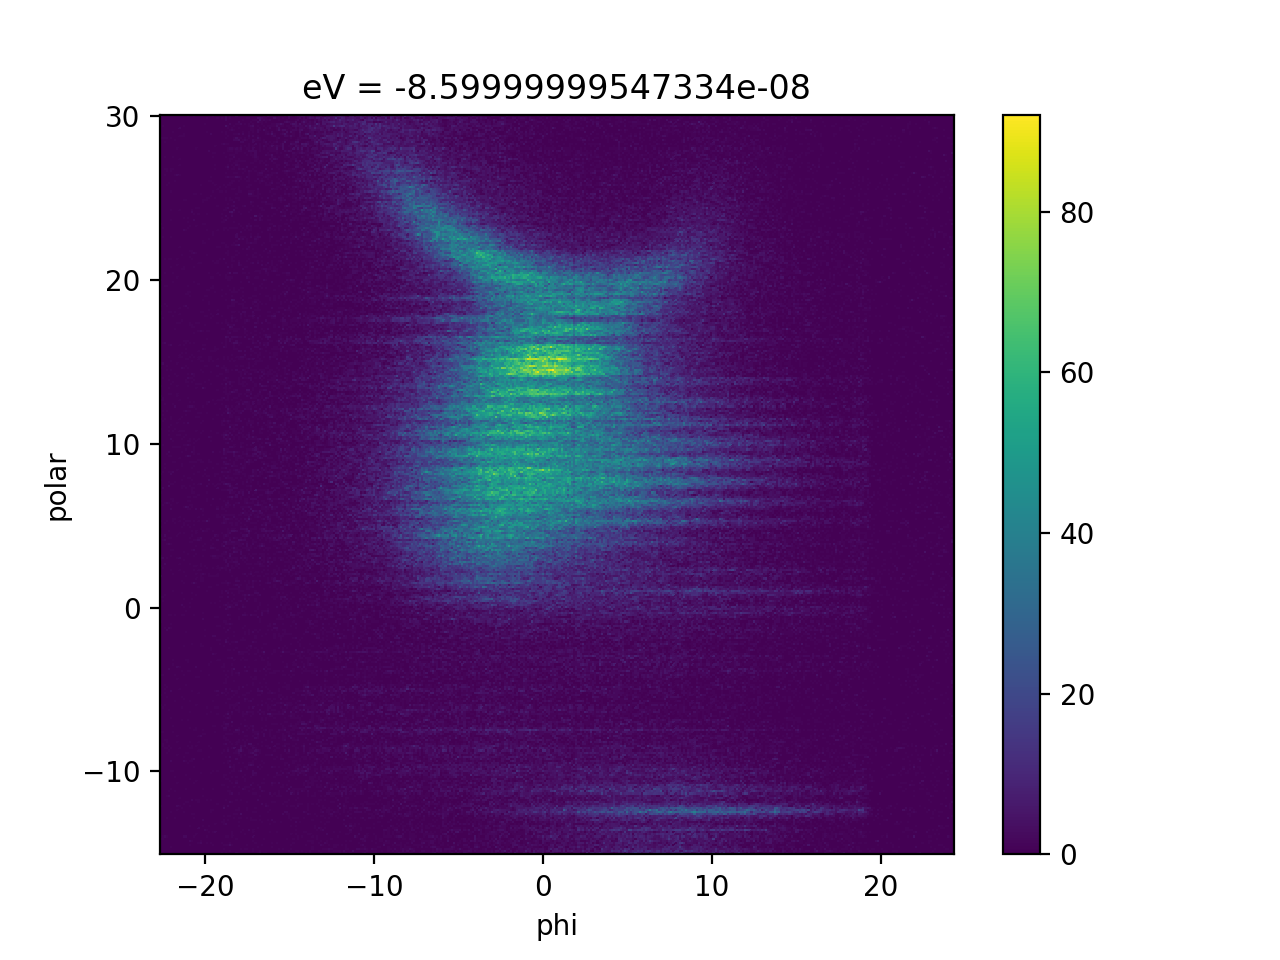

In [244]:
map_41.sel(eV=0, method='nearest').plot()

In [245]:
fermi_surface_slices(map_41)

:Layout
   .Image.Hyphen_minus_0_eV              :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_02_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_04_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_06_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_08_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_1_eV  :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_12_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_14_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_16_eV :Image   [phi,polar]   (z)

<IPython.core.display.Javascript object>


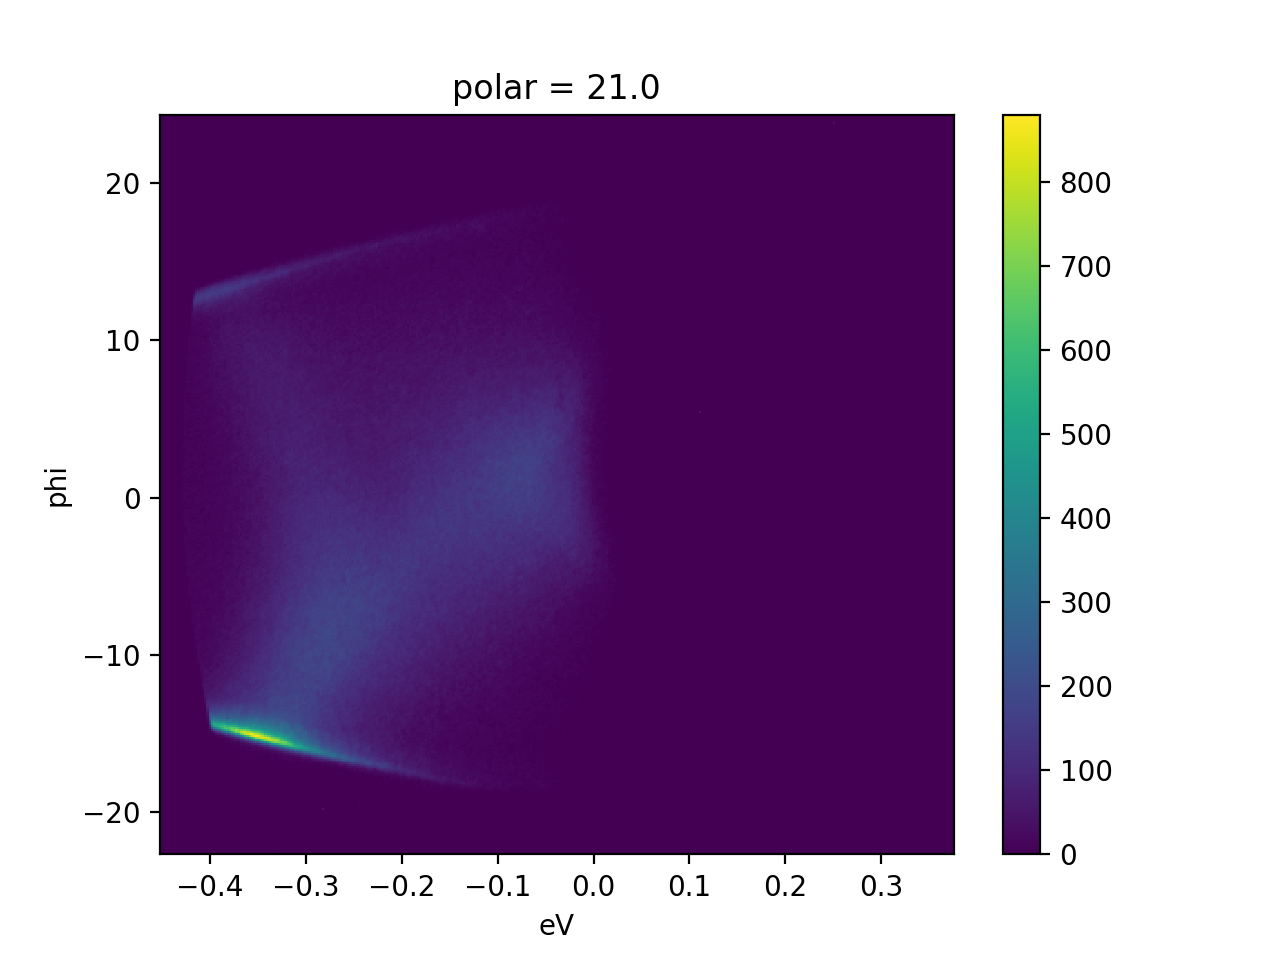

In [248]:
map_41.sel(polar=21, method='nearest').plot()

From the above, it appears relatively clear that the Gamma point is at polar=-4 or so, and that the phi offset is 0.7

## Map f00015


In [249]:
map_15 = load_dataset(ds.loc['f00015', ('id',)])

/Users/chstansbury/PyCharmProjects/python-arpes/arpes/io.py:116: UserWarning: Could not fetch cleave information.
  warnings.warn('Could not fetch cleave information.')


In [251]:
fermi_surface_slices(map_15)

:Layout
   .Image.Hyphen_minus_0_eV              :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_02_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_04_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_06_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_08_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_1_eV  :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_12_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_14_eV :Image   [phi,polar]   (z)
   .Image.Hyphen_minus_0_full_stop_16_eV :Image   [phi,polar]   (z)

Polar offset seems pretty close to zero, the phi offset appears to be around 4 degrees